Task : 

1 - Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2 - Figure out if any preprocessing such as scaling would help here

3 - Draw elbow plot and from that figure out optimal value of k

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [10]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['flower'] = iris.target

In [12]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)

In [14]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


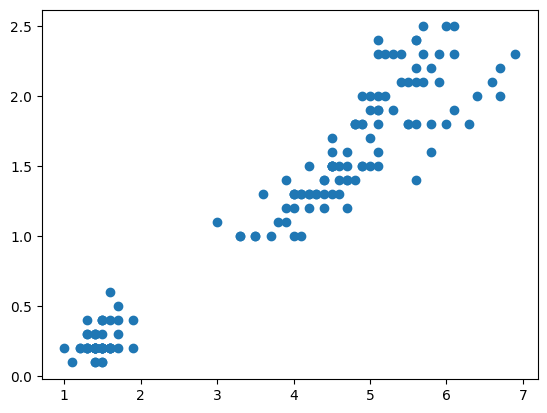

In [15]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

After seeing this scatter plot we can say that number of clusters are either 2 or 3.

Let's confirm this using "Elbow Point Method" , calculating most optimal number of clusters

In [16]:
k_range = range(1, 11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 20.238882783882783,
 14.130893864755937,
 13.010934398934396,
 9.475890420495684,
 7.976856839067365,
 7.137380023358283,
 6.528770739064854]

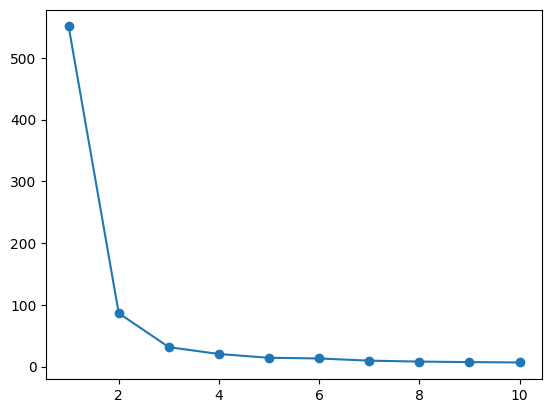

In [17]:
plt.plot(k_range, sse, marker='o')

So from this plot we can say that number of cluster = 3 is most optimal for this dataset

In [18]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df)

In [19]:
df['cluster'] = y_predicted

df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [20]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

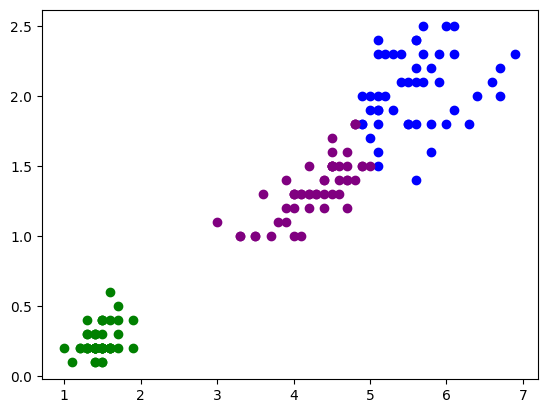

In [21]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='purple')